In [168]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate

In [169]:
#Daten einlesen
with open('EnergiespektrumOffen') as data:
    energie = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('EnergiespektrumOffen') as data:
    count = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('EnergiespektrumLGGesperrt') as data:
    energieGesperrt = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('EnergiespektrumLGGesperrt') as data:
    countGesperrt = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('Energiespektrum90DegLGGesperrt') as data:
    energie90DegGesperrt = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('Energiespektrum90DegLGGesperrt') as data:
    count90DegGesperrt = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

with open('Energiespektrum90DegLGOffen') as data:
    energie90DegLGOffen = np.loadtxt((line.replace(',', '.') for line in data), usecols= 0, delimiter=";")
with open('Energiespektrum90DegLGOffen') as data:
    count90DegLGOffen = np.loadtxt((line.replace(',', '.') for line in data), usecols= 1, delimiter=";")

In [170]:
#Methoden Gaußfits für Mittelwerte
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt[0], popt[1] , popt[2], popt[3], pcov[2,2], pcov[3,3]

MW: 3.377 pm 0.0013614690840278551 SD: 0.144 pm 0.0016996852385807457
MW Beta Zerfall: 8.263 pm 0.0037309531973229123 SD: 0.241 pm 0.005384768446676565
FWHM: 0.3387
FWHM Beta Zerfall: 0.5678


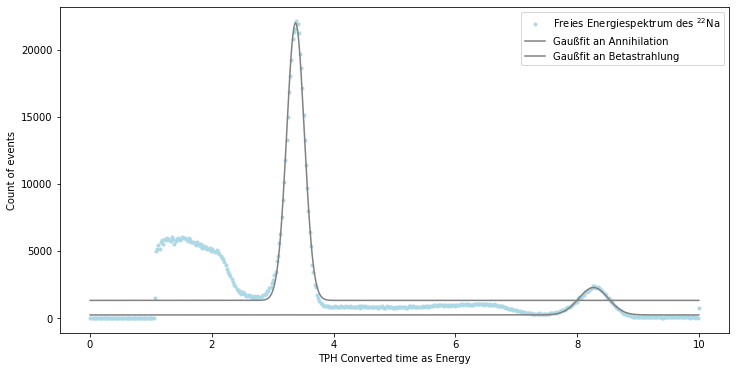

In [171]:
#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('TPH Converted time as Energy')
ax.set_ylabel('Count of events')
#Plotten der unskalierten Kurven
ax.plot(energie, count,'o',markersize=3, color = "lightblue",label = "Freies Energiespektrum des $^{22}$Na")
#ax.plot(energie90DegLGOffen, count90DegLGOffen,'o',markersize=3, color = "orange",label = "Freies Energiespektrum des $^{22}$Na mit um 90$^{°}$ rotiertem Detektor")

#Gauß
H, A, x, sigma, fehlermü, fehlersd = gauss_fit(energie[138:199] , count[138:199])
print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))

Hbeta, Abeta, xbeta, sigmabeta, fehlermübeta, fehlersdbeta = gauss_fit(energie[369:451] , count[369:451])
print('MW Beta Zerfall:',round(xbeta,3), 'pm', np.sqrt(fehlermübeta), 'SD:', round(sigmabeta,3), 'pm', np.sqrt(fehlersdbeta))

# H90Degree, A90Degree, x90Degree, sigma90Degree, fehlermü90Degree, fehlersd90Degree = gauss_fit(energie90DegLGOffen[138:199] , count90DegLGOffen[138:199])
# print('MW 90 Grad:',round(x90Degree,3), 'pm', np.sqrt(fehlermü90Degree), 'SD:', round(sigma90Degree,3), 'pm', np.sqrt(fehlersd90Degree))

FWHM = round(2.35482 * sigma,4)
print('FWHM:',FWHM)

FWHMbeta= round(2.35482 * sigmabeta,4)
print('FWHM Beta Zerfall:',FWHMbeta)

# FWHM90Degree = round(2.35482 * sigma,4)
# print('FWHM:',FWHM90Degree)

ax.plot(energie, gauss(energie, H,A,x,sigma), color = "grey", label="Gaußfit an Annihilation")
ax.plot(energie, gauss(energie, Hbeta, Abeta, xbeta, sigmabeta), color = "grey", label="Gaußfit an Betastrahlung")

#ax.plot(energie90DegLGOffen, gauss(energie90DegLGOffen, H90Degree,A90Degree,x90Degree,sigma90Degree), color = "grey")

ax.legend(fontsize=10)
fig.savefig('Peakpositionen.png', dpi=200)

MW: 3.181 pm 0.0012938918290339744 SD: 0.138 pm 0.0015696118033243249
MW Beta Zerfall: 228.065 pm 0.0036494099886192127 SD: 0.229 pm 0.00515527631640354
FWHM offene Torstufe bei 90°: 0.3257
FWHM Beta Zerfall offene Torstufe bei 90°: 0.5394


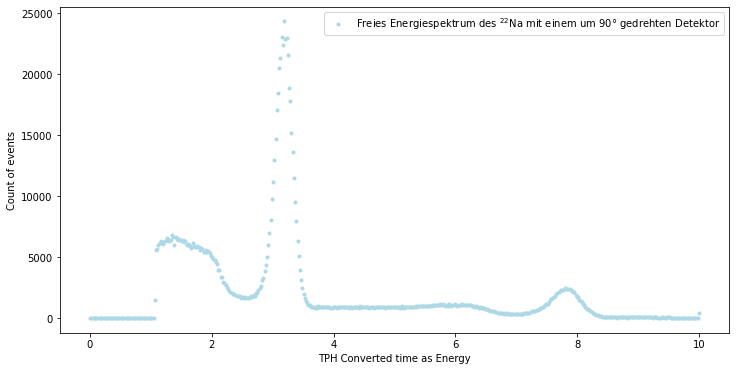

In [172]:
#90 DEGREE OPEN
# Energyspectrum open LG 90 Degree
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('TPH Converted time as Energy')
ax.set_ylabel('Count of events')
#Plotten der unskalierten Kurven
ax.plot(energie90DegLGOffen, count90DegLGOffen,'o',markersize=3, color = "lightblue",label = "Freies Energiespektrum des $^{22}$Na mit einem um 90° gedrehten Detektor")

#Gauß
H90Deg, A90deg, x90deg, sigma90deg, fehlermü90deg, fehlersd90deg = gauss_fit(energie90DegLGOffen[138:199] , count90DegLGOffen[138:199])
print('MW:',round(x90deg,3), 'pm', np.sqrt(fehlermü90deg), 'SD:', round(sigma90deg,3), 'pm', np.sqrt(fehlersd90deg))

H90degbeta, A90degbeta, x90degbeta, sigma90degbeta, fehlermü90degbeta, fehlersd90degbeta = gauss_fit(energie90DegLGOffen[347:427] , count90DegLGOffen[347:427])
print('MW Beta Zerfall:',round(H90degbeta,3), 'pm', np.sqrt(fehlermü90degbeta), 'SD:', round(sigma90degbeta,3), 'pm', np.sqrt(fehlersd90degbeta))

# H90Degree, A90Degree, x90Degree, sigma90Degree, fehlermü90Degree, fehlersd90Degree = gauss_fit(energie90DegLGOffen[138:199] , count90DegLGOffen[138:199])
# print('MW 90 Grad:',round(x90Degree,3), 'pm', np.sqrt(fehlermü90Degree), 'SD:', round(sigma90Degree,3), 'pm', np.sqrt(fehlersd90Degree))

FWHM90deg = round(2.35482 * sigma90deg,4)
print('FWHM offene Torstufe bei 90°:',FWHM90deg)

FWHM90degbeta= round(2.35482 * sigma90degbeta,4)
print('FWHM Beta Zerfall offene Torstufe bei 90°:',FWHM90degbeta)

# FWHM90Degree = round(2.35482 * sigma,4)
# print('FWHM:',FWHM90Degree)

# ax.plot(energie, gauss(energie, H,A,x,sigma), color = "grey", label="Gaußfit an Annihilation")
# ax.plot(energie, gauss(energie, Hbeta, Abeta, xbeta, sigmabeta), color = "grey", label="Gaußfit an Betastrahlung")

#ax.plot(energie90DegLGOffen, gauss(energie90DegLGOffen, H90Degree,A90Degree,x90Degree,sigma90Degree), color = "grey")

ax.legend(fontsize=10)
fig.savefig('Peakpositionen.png', dpi=200)

In [173]:
E_elektron = 511
calibrationfactor = E_elektron / x 
calibrationfactorfehler = fehlersd/x

E_beta = 1275
calibrationfactorbeta = E_beta / xbeta
calibrationfactorbetafehler = fehlersdbeta/xbeta

print(calibrationfactor)
print(calibrationfactorfehler)
print(calibrationfactorbeta)
print(calibrationfactorbetafehler)



151.31360013248573
8.554488948145567e-07
154.30584294956626
3.5091849007908265e-06


In [174]:
#Integration over open FWHM
FWHMopenintegration = integrate.quad(lambda integrator: gauss(integrator, H,A,x,sigma),x-FWHM/2,x+FWHM/2)
print("Integration over FWHM: ", FWHMopenintegration)
FWHMopenbetaintegration = integrate.quad(lambda integrator: gauss(integrator, Hbeta, Abeta, xbeta, sigmabeta),xbeta-FWHMbeta/2,xbeta+FWHMbeta/2)
print("Integration over FWHM Beta: ", FWHMopenbetaintegration)

#Integration over open 90° FWMH
FWHMopen90degintegration = integrate.quad(lambda integrator: gauss(integrator, H90Deg,A90deg,x90deg,sigma90deg),x90deg-FWHM90deg/2,x90deg+FWHM90deg/2)
print("Integration over 90° FWHM: ", FWHMopen90degintegration)

H90Degbeta, A90degbeta, x90degbeta, sigma90degbeta, fehlermü90degbeta, fehlersd90degbeta = gauss_fit(energie90DegLGOffen[347:427] , count90DegLGOffen[347:427])
FWHMopen90degbetaintegration = integrate.quad(lambda integrator: gauss(integrator, H90Degbeta, A90degbeta, x90degbeta, sigma90degbeta),xbeta-FWHMbeta/2,xbeta+FWHMbeta/2)
print("Integration over 90° FWHM Beta: ", FWHMopen90degbetaintegration)

Integration over FWHM:  (6128.087811307345, 6.803544185038196e-11)
Integration over FWHM Beta:  (1069.0990498528843, 1.1869383807515501e-11)
Integration over 90° FWHM:  (6233.004972502664, 6.920025633075548e-11)
Integration over 90° FWHM Beta:  (384.3431966062873, 4.267066662303335e-12)


MW: 3.32 pm 0.0013566491502047288 SD: 0.146 pm 0.0016229614709770118
MW Gesperrt: 63.124 pm 0.0021667722998124357 SD: 0.142 pm 0.002560852670393357
FWHM gesperrt: 0.3447
FWHM90Deg gesperrt: 0.3332


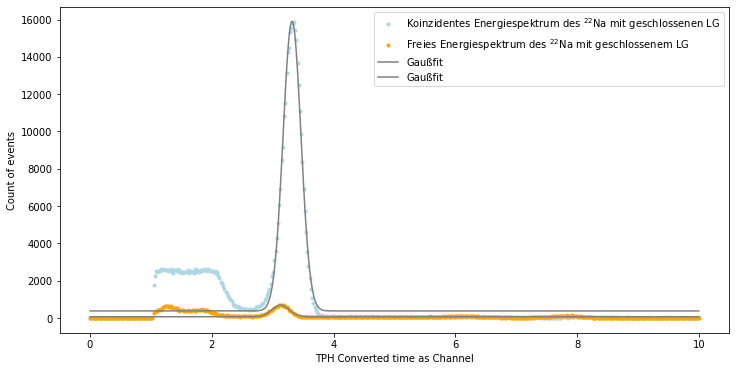

In [175]:
#####CLOSED#####
#Energy spectrums for closed LG

fig2, ax2 = plt.subplots(figsize=(12,6))

#Name for axis
ax2.set_xlabel('TPH Converted time as Channel')
ax2.set_ylabel('Count of events')
#Plotten der unskalierten Kurven
ax2.plot(energieGesperrt, countGesperrt,'o',markersize=3, color = "lightblue",label = "Koinzidentes Energiespektrum des $^{22}$Na mit geschlossenen LG")
ax2.plot(energie90DegGesperrt, count90DegGesperrt,'o',markersize=3, color = "orange",label = "Koinzidentes Energiespektrum des $^{22}$Na mit geschlossenem LG und 90° Detektor")

#Gauß
Hgesperrt, Agesperrt, xgesperrt, sigmagesperrt, fehlermügesperrt, fehlersdgesperrt = gauss_fit(energieGesperrt[130:199] , countGesperrt[130:199])
print('MW:',round(xgesperrt,3), 'pm', np.sqrt(fehlermügesperrt), 'SD:', round(sigmagesperrt,3), 'pm', np.sqrt(fehlersdgesperrt))

H90DegGesperrt, A90DegGesperrt, x90DegGesperrt, sigma90DegGesperrt, fehlermü90DegGesperrt, fehlersd90DegGesperrt = gauss_fit(energie90DegGesperrt[130:199] , count90DegGesperrt[130:199])
print('MW Gesperrt:',round(H90DegGesperrt,3), 'pm', np.sqrt(fehlermü90DegGesperrt), 'SD:', round(sigma90DegGesperrt,3), 'pm', np.sqrt(fehlersd90DegGesperrt))

FWHMgesperrt = round(2.35482 * sigmagesperrt,4)
print('FWHM gesperrt:',FWHMgesperrt)

FWHM90DegGesperrt = round(2.35482 * sigma90DegGesperrt,4)
print('FWHM90Deg gesperrt:',FWHM90DegGesperrt)

ax2.plot(energieGesperrt, gauss(energieGesperrt, Hgesperrt, Agesperrt, xgesperrt, sigmagesperrt), color = "grey", label="Gaußfit")
ax2.plot(energie90DegGesperrt, gauss(energieGesperrt, H90DegGesperrt, A90DegGesperrt, x90DegGesperrt, sigma90DegGesperrt), color = "grey", label="Gaußfit")

ax2.legend(fontsize=10)
fig2.savefig('EnergiespektrumGesperrt.png', dpi=200)

In [176]:
#Integration over FWHM for closed LG
FWHMintegrationclosed = integrate.quad(lambda integrator: gauss(integrator, Hgesperrt, Agesperrt, xgesperrt, sigmagesperrt),xgesperrt-FWHMgesperrt/2,xgesperrt+FWHMgesperrt/2)
print("Integration over FWHM closed: ", FWHMintegrationclosed)

FWHMintegrationclosed90Deg = integrate.quad(lambda integrator: gauss(integrator, H90DegGesperrt, A90DegGesperrt, x90DegGesperrt, sigma90DegGesperrt),x90DegGesperrt-FWHM90DegGesperrt/2,x90DegGesperrt+FWHM90DegGesperrt/2)
print("Integration over FWHM closed: ", FWHMintegrationclosed90Deg)


Integration over FWHM closed:  (4473.6469835954795, 4.966745885232581e-11)
Integration over FWHM closed:  (190.27727661614347, 2.1125021356221237e-12)
